# HW Set 10 - Random Stuff
## Due Nov 19 2015

### Name:   James O. Thomas 

In [1]:
%matplotlib inline

# Exercise 6.4

Write a program to solve the reisitor network problem of Exercise 6.1 on page 220 using the function solve from numpy.linalg. If you also did Exercise 6.1, you should check that you get the same answer both times.

In order to solve this we first need to come up with the linear equations. Considering each point we have:

\begin{align}
0 &= \frac{V_1-V_2}{R} + \frac{V_1-V_3}{R} + \frac{V_1-V_4}{R} + \frac{V_1-V_0}{R} \\
0 &= \frac{V_2-V_1}{R} + \frac{V_2-V_4}{R} + \frac{V_2-0}{R} \\
0 &= \frac{V_3-V_0}{R} + \frac{V_3-V_1}{R} + \frac{V_3-V_4}{R} \\
0 &= \frac{V_4-V_3}{R} + \frac{V_4-V_1}{R} + \frac{V_4-V_2}{R} + \frac{V_4-0}{R}
\end{align}

clearing the $R$ and doing a little algebra we get

\begin{align}
4V_1 - V_2 - V_3 - V_4 &= V_0 \\
-V_1 + 3V_2 + 0 -V_4 &= 0 \\
-V_1 + 0 + 3 V_3 - V_4 &= V_0 \\
-V_1 - V_2 - V_3 + 4V_4 &= 0
\end{align}

These are the linear equations we need to solve.

In [2]:
# Exercise 6.4
import numpy as np
# Ax = B

A = np.matrix([[4, -1, -1, -1],[-1, 3, 0, -1],[-1, 0, 3, -1],[-1, -1, -1, 4]])
B = np.matrix([5, 0, 5, 0])
B = np.transpose(B)
X = np.linalg.solve(A,B)
print('The voltage V1 is ', X[0])
print('The voltage V2 is ', X[1])
print('The voltage V3 is ', X[2])
print('The voltage V4 is ', X[3])

The voltage V1 is  [[ 3.]]
The voltage V2 is  [[ 1.66666667]]
The voltage V3 is  [[ 3.33333333]]
The voltage V4 is  [[ 2.]]


# Exercise 6.8: the QR algorithm:



In [ ]:
# Solution to problem 6.8: QR algorithm

import numpy as np

def QR (A):
    # square matrix has same number of columns as rows
    n,n = np.shape(A)
    # preallocate the Q,R, matrices
    Q = np.zeros(np.shape(A))
    R = np.zeros(np.shape(A))
    for j in range(n):
        v = A[:,j]
        
    
    return Q, R

# Exercise 6.10:

Consider the equation $x=1-e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c=2$. Calculate your solution to an accuracy of atleast $10^{-6}$.

2. Modify your program to calculate the solution for values of $c$ from from $0$ to $3$ in steps of 0.01 and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime in which $x=0$ to a regime of nonzero $x$. this is another example of a phase transition. In physics this transition is known as the *percolation transition*; in epidemiology is is the *epidemic threshold*.

In [3]:
# Exercise 6.10 part 1
import numpy as np

def f(x,c):
    f = 1-np.exp(-c*x)
    return f

def fprime(x,c):
    fp = c*np.exp(-c*x)
    return fp
    
c = 2
accuracy = 1e-6
error = 1       # get inside the loop
x = 0.5         # a first guess

while error > accuracy:
    xnew = f(x,c)
    error = np.abs((x - xnew)/(1-fprime(x,c)))
    x = xnew
    
print(' x = ',x)

 x =  0.796811824496


1013188


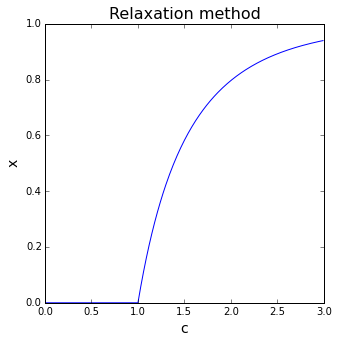

In [4]:
# Exercise 6.10 part 2
# now do the loop

import numpy as np
import matplotlib.pyplot as plt
count = 0
def f(x,c):
    global count
    count +=1
    f = 1-np.exp(-c*x)
    return f

def fprime(x,c):
    fp = c*np.exp(-c*x)
    return fp

c_vals = np.arange(0.0,3.0,0.01)
accuracy = 1e-6
solns = []  # for storing the solutions

for c in c_vals:
    error = 1
    x = 0.05
    while error > accuracy:
        xnew = f(x,c)
        error = np.abs((x-xnew)/(1-fprime(x,c)))
        x = xnew
    solns.append(x)

print(count)
plt.figure(figsize = (5,5))
plt.plot(c_vals,solns)
plt.title('Relaxation method', size = 16)
plt.xlabel('c', size = 14)
plt.ylabel('x', size = 14)
plt.show()

We can see that the solution for part 1 is $ x = 0.796811824496 $ which is within the tolerance of the exact value (according to wolframalpha) of $ x = 0.796812 $.

From part 2 we can see that the transition occurs at $ c = 1 $.

# Exercise 6.12

The biochemical process of *glycolysis*, the breakdown of glucose in the body to release energy, can be modeled by the equations

$$\frac{dx}{dt} = -x + ay + x^2y $$

$$\frac{dy}{dt} = b -ay -x^2y $$

Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P, and $a$ and $b$ are positive constants. One of the important features of nonlinear equations like these is their *stationary points*, meaning values of $x$ and $y$ at which the derivatives of both variables becomes zero simultaneously, so that the variables stop changing and become constant in time. Setting the derivatives to zero above, the stationary points of our glycolosis equations are solutions of 

$$ -x + ay + x^2y = 0 $$

$$ b -ay -x^2y = 0 $$

1. Demonstrate analytically that the solution of these equations is $x=b$, $y=\frac{b}{a + b^2}$

2. Show that the equations can be rearranged to read $x = y(a + x^2)$, $ y = \frac{b}{a + x^2}$ and write a program to solve these for the stationary point using the relaxation method with $a=1$ and $b=2$. You should find that the method fails to converge to a solution in this case.

3. Find a different way to rearrange the equations such that when you apply the relaxation method again it now converges to a fixed point and gives a solution. Verify that the solution you get agrees with part (1).

## Solution to part 1
All we need to do here is plug in the given values and verify that both $\frac{dx}{dt} $ and $ \frac{dy}{dt} $ are 0.

\begin{align}
\frac{dx}{dt} &= -x + ay + x^2 y \\
&= -b + a \left( \frac{b}{a+b^2} \right) + b^2 \left(\frac{b}{a+b^2} \right) \\
&= -b + \frac{ab}{a+b^2} + \frac{b^3}{a+b^2} \\
&= \frac{-b(a+b^2)}{a+b^2} + \frac{ab}{a+b^2} + \frac{b^3}{a+b^2} \\
&= \frac{-ba-b^3+ab+b^3}{a+b^2} \\
&= \frac{0}{a+b^2} \\
&=0
\end{align}

and

\begin{align}
\frac{dy}{dt} &= b - ay -x^2y \\
&= b - a \left( \frac{b}{a+b^2} \right) - b^2 \left(\frac{b}{a+b^2} \right) \\
&= b - \frac{ab}{a+b^2} - \frac{b^3}{a+b^2} \\
&= \frac{b(a+b^2)}{a+b^2} - \frac{ab}{a+b^2} - \frac{b^3}{a+b^2} \\
&= \frac{ba+b^3-ab-b^3}{a+b^2} \\
&= \frac{0}{a+b^2} \\
&=0
\end{align}

Therefore $ x = b $ and $ y = \frac{b}{a+b^2} $ are solutions for the stationary states of the given differentials.

## Solution to part 2

This is simply rearranging the given equations.

$$ -x + ay + x^2y = 0 $$

$$ x = ay + x^2y $$

$$ x = y(a + x^2) $$

and

$$ b -ay -x^2y = 0 $$

$$ ay + x^2y = b $$

$$ y(a + x^2) = b $$

$$ y = \frac{b}{a + x^2} $$

In [6]:
# Exercise 6.12 part 2
import numpy as np

def RHS (r,a,b):
    x = r[0]  # unpack because its clearer for me
    y = r[1]
    xnew = y*(a + x**2)
    ynew = b/(a + x**2)
    return [xnew, ynew]

tolerance = 1e-3
maxtries = 1e6
checks = np.array([1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5], dtype = int)
a = 1.0
b = 2.0

# exact solutions (known analytically)
x_exact = b
y_exact = b/(a + b**2)
r_exact = np.array([x_exact, y_exact])

#initial guesses
x = 1.5
y = 0.5
r = np.array([x,y])

error = 1 # get inside the loop
n = 0

go = True

while go == True:
    r_new = RHS(r,a,b)
    error = np.max(np.absolute(r_new - r_exact))
    r = r_new
    n+=1
    if error < tolerance:
        go = False
        
    if n > maxtries:
        go = False
        
    if n in checks:
        print('working.', round(n/maxtries*100,1),' %')

if n == maxtries + 1:
    print('tolerance not reached in ',n, ' iterations')
else:
    print('the solution of x = ',r[0], ' and y = ', r[1],' was found after ', n, ' iterations')

working. 10.0  %
working. 20.0  %
working. 30.0  %
working. 40.0  %
working. 50.0  %
working. 60.0  %
working. 70.0  %
working. 80.0  %
working. 90.0  %
tolerance not reached in  1000001  iterations


As expected, this did not converge to the correct solution, even with the relatively low tolerance of $10^{-3}$.

Now we rearrange the equations again:

\begin{align}
0 &= -x + ay + x^2y \\
x &= ay + x^2y \\
x &= y \left( a + x^2 \right) \\
y &= \frac{x}{a + x^2}
\end{align}

and

\begin{align}
0 &= b - ay - x^2y \\
x^2y &= b - ay \\
x^2 &= \frac{b}{y} - a \\
x &= \sqrt{\frac{b}{y} - a}
\end{align}

In [7]:
# Exercise 6.12 part 3
import numpy as np

def RHS (r,a,b):
    x = r[0]  # unpack because its clearer for me
    y = r[1]
    xnew = np.sqrt(b/y - a)
    ynew = x/(a + x**2)
    return [xnew, ynew]

tolerance = 1e-7
maxtries = 1e6
checks = np.array([1e5, 2e5, 3e5, 4e5, 5e6, 6e5, 7e5, 8e5, 9e5], dtype = int)
a = 1.0
b = 2.0

# exact solutions (known analytically)
x_exact = b
y_exact = b/(a + b**2)
r_exact = np.array([x_exact, y_exact])

#initial guesses
x = 1.5
y = 0.5
r = np.array([x,y])

error = 1 # get inside the loop
n = 0

go = True

while go == True:
    r_new = RHS(r,a,b)
    error = np.max(np.absolute(r_new - r_exact))
    r = r_new
    n+=1
    if error < tolerance:
        go = False
        
    if n > maxtries:
        go = False
        
    if n in checks:
        print('working.', round(n/maxtries*100,1),' %')

if n == maxtries + 1:
    print('tolerance not reached in ',n, ' iterations')
else:
    print('the solution of x = ',r[0], ' and y = ', r[1],' was found after ', n, ' iterations')
    
print('the exact solutions are x = ',x_exact,' and y = ',y_exact)

the solution of x =  1.99999993063  and y =  0.400000012589  was found after  32  iterations
the exact solutions are x =  2.0  and y =  0.4


Using these new rearrangements, we can see that this algorithm found the exact solution to within the given tolerance.

# Exercise 6.15: The roots of a polynomial

Consider the sixth-order polynomial

$$P(x) = 924x^6 - 2772x^5 + 3150x^4 - 1680x^3 + 420x^2 -42x + 1$$

There is no general formula for the roots of a sixth-order polynomail, but you can find them easily enough using a computer.

1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find rough values for the six roots of the polynomial - the points at which the function is zero.

2. Write a Python program to solve for the the positions of all six roots to at least ten decimal places of accuracy, using Newton's method.

Note that the polynomial in this example is just the sixth Legendre polynomial (mapped onto the interval from zero to one), so the calculation performed here is the same as finding the integration points for 6-point Gaussin quadrature (see Section 5.6.2), and indeed Newton's method of choice for calculating Gaussian quadrature points.

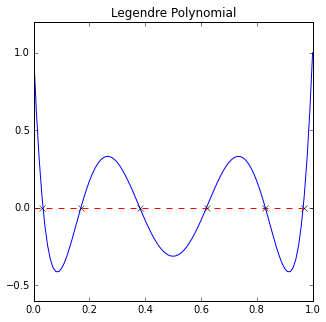

the approximate zeros are at x =  [ 0.03  0.17  0.38  0.62  0.83  0.97]


In [8]:
# Solution to exercise 6.15 part 1
# approximate solutions
import numpy as np
import matplotlib.pyplot as plt

def P(x):
    P = 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    return P
    
x = np.arange(0,1.01,0.01)
Pval = P(x)

approx = np.array([0.03,0.17,0.38,0.62,0.83,0.97])
plt.figure(figsize = (5,5))
plt.plot(x,Pval)
plt.plot([0,1],[0,0], 'r--')
plt.plot(approx,np.zeros(len(approx)), 'kx')
plt.title('Legendre Polynomial')
plt.show()
print('the approximate zeros are at x = ',approx)

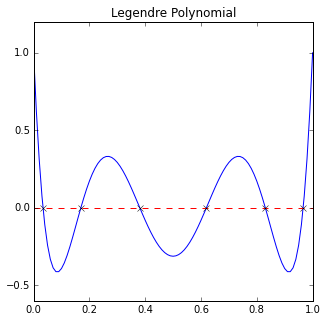

the exact zeros are at x =  [ 0.0337652429  0.1693953068  0.380690407   0.619309593   0.8306046932
  0.9662347571]


In [9]:
# Solution to exercise 6.15 part 2
# find the solutions using Newton's method
import numpy as np
import matplotlib.pyplot as plt

def P(x):
    P = 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    return P
    
def Pprime(x):
    Pprime = 924*6*x**5 - 2772*5*x**4 + 3150*4*x**3 - 1680*3*x**2 + 420*2*x - 42
    return Pprime

approx = np.array([0.03,0.17,0.38,0.62,0.83,0.97])
exact = np.zeros(len(approx))
tolerance = 1e-10
    
for i in range(len(approx)):
    x = approx[i]
    error = 1
    while error > tolerance:
        xnew = x - P(x)/Pprime(x)
        error = np.abs(x-xnew)
        x = xnew
    exact[i] = x
    
x = np.arange(0,1.01,0.01)
Pval = P(x)

plt.figure(figsize = (5,5))
plt.plot(x,Pval)
plt.plot([0,1],[0,0], 'r--')
plt.plot(exact,np.zeros(len(approx)), 'kx')
plt.title('Legendre Polynomial')
plt.show()
np.set_printoptions(precision = 10)
print('the exact zeros are at x = ',exact)

# Exercise 16: The Lagrange point

There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. this works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit.

1. Assuming circuar orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance $r$ from the center of the Earth to the $L_1$ point satisfies  $ \frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega ^2 r $, where $R$ is the distance form the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega $ is the angular velocity of both the Moon and the satellite.

2. The equation above is a fifth-order polynomial equaion in $r$ (also called a quintic equation). Such equations cannnot be solved exactly in closed form, but it's straight forward to solve them numerically. Write a program that uses either Newton's method or the secant method to solve for the distance $r$ from the Earth to the $L_1$ point. compute a solution accurate to at least four significant figures. You will also need to choose a suitable starting value for $r$, or two starting values if you use the secant method.

## Solution to part 1

We can find this expression using Newton's second law: $\sum \vec{F} = m \vec{a} $.

where $\sum \vec{F} $ consists of the gravitational force on the satellite from Earth plus the gravitational force on the satellite from the Moon and the acceleration is a centrepital acceleration.

\begin{align}
m_s \vec{a} &= \vec{F}_{G_{E}} + \vec{F}_{G_{M}} \\
m_s \omega ^2 r_{rotation} &= \frac{Gm_sM_{earth}}{r_{Es}^2} - \frac{Gm_sm_{moon}}{r_{ms}^2}  \\
\omega ^2r &= \frac{GM}{r^2} - \frac{Gm}{(R-r)^2}
\end{align}

In [10]:
# solution to exercise 16 part 2
import numpy as np

def f(r):
    f = omega**2*r - G*M/r**2 + 2*G*m/(R-r)**2
    return f

def fprime(r):
    fp = omega**2 + 2*G*M/r**3 + 2*G*m/(R-r)**3
    return fp

    
# define a bunch of parameters
G = 6.674e-11     # m^3kg^-1s^-2
M = 5.974e24      # kg
m = 7.348e22      # kg
R = 3.844e8       # m
omega = 2.662e-6  # s^-1

accuracy = 1e-7
error = 100.      # get inside the loop
r = R*0.5         # a first guess

count = 0
while error > accuracy:
    rnew = r - f(r)/fprime(r)
    error = np.abs(rnew - r)
    r = rnew    
    count +=1
    
print('number of iterations needed = ',count)
print('r = ',r/1000, ' km')
print('which is ',round(r/R*100,2),'% of the Earth-Moon distance')

number of iterations needed =  43
r =  312161.7259795667  km
which is  81.21 % of the Earth-Moon distance


According to this method the $L_1$ point is at about 81% of the Earth-moon distance. This is fairly close to the 85% I remember from undergrad.